<a href="https://colab.research.google.com/github/qwerqc/2024-1-my-BDA/blob/main/inclass/12w_0528_tue_B_ch14_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 12주차 B반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.2 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

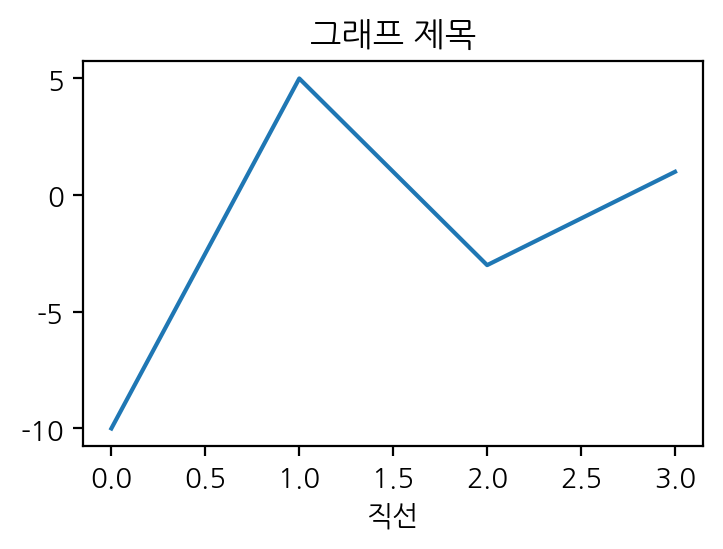

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 데이터프레임 가로로 여러 개 출력하기

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [11]:
display_side_by_side(exam.head(), exam[['id', 'math', 'english']].head())

id 
 nclass 
 math 
 english 
 science 
 
 
 
 
 0 
 1 
 1 
 50 
 98 
 50 
 
 
 1 
 2 
 1 
 60 
 97 
 60 
 
 
 2 
 3 
 1 
 45 
 86 
 78 
 
 
 3 
 4 
 1 
 30 
 98 
 58 
 
 
 4 
 5 
 2 
 25 
 80 
 65 
 
 
      
 
 
 
 id 
 math 
 english 
 
 
 
 
 0 
 1 
 50 
 98 
 
 
 1 
 2 
 60 
 97 
 
 
 2 
 3 
 45 
 86 
 
 
 3 
 4 
 30 
 98 
 
 
 4 
 5 
 25 
 80

### [교재내용](https://dream-be-develop.tistory.com/26)

# **다섯째마당. 데이터 과학의 세계**
---
---

### 기술 통계와 추론 통계

- 통계 분석은 기술 통계와 추론 통계로 나눌 수 있음. 데이터를 요약해 설명하는 통계 분석 기법을 기술 통계(descriptive statistics)라고 함. 예를 들어 사람들이 받는 월급을 집계해 전체 월급 평균을 구한다면 이는 '기술 통계 분석'임.

- 추론 통계(inferential statistics)는 단순히 숫자를 요약하는 것을 넘어 어떤 값이 발생할 확률을 계산하는 통계 분석 기법임.  

  *   예를 들어 데이터에서 성별에 따라 월급에 차이가 있는 것으로 나타났을 때, 이런 차이가 우연히 발생할 확률을 계산함.
  *   만약 이런 차이가 우연히 나타날 확률이 작다면 성별에 따른 월급 차이가 통계적으로 유의하다(statistically significant)고 결론 내림.
  *   반대로 이런 차이가 우연히 나타날 확률이 크다면 성별에 따른 월급 차이가 통계적으로 유의하지 않다(not statistically significant)고 결론 내림.

- 일반적으로 통계 분석을 수행했다는 것은 추론 통계를 이용해 가설 검정을 했다는 의미임. 기술 통계 분석에서 집단 간 차이가 있는 것으로 나타났더라도 이는 우연에 의한 차이일 수 있음. 데이터를 이용해 신뢰할 수 있는 결론을 내리려면 유의확률을 계산하는 통계적 가설 검정 절차를 거쳐야 함.

## [통계적 추론(統計的 推論, statistical inference) 또는 추론 통계](https://ko.wikipedia.org/wiki/%ED%86%B5%EA%B3%84%EC%A0%81_%EC%B6%94%EB%A1%A0)
- 모집단에 대한 어떤 미지의 양상을 알기 위해 통계학을 이용하여 추측하는 과정
- 통계학의 한 부분으로서 추론 통계학(Inferential statistics)이라고 불린다. 이것은 기술 통계학(descriptive statistics)과 구별되는 개념이다.
- 모집단에 대한 추론을 100% 확신하기 위해서는 모집단 전체를 표본으로 조사해야 한다. 그러나 경제성 또는 시간 또는 양적접근의 한계 등의 이유로 불가능한 경우가 많기 때문에 표본에서 얻은 정보를 가지고 추론한다.

#### 통계추론은 추정(estimation)과 가설검정(testing hypothesis)으로 나눌 수 있다.
- 추정(estimation):  표본을 통해 모집단 특성이 어떠한가에 대해 추측하는 과정
    - 표본평균 계산을 통해 모집단평균을 추측해보거나, 모집단 평균에 대한 95% 신뢰구간의 계산 과정을 나타낸다.
- 가설검정(testing hypothesis): 모집단 실제값이 얼마나 되는가 하는 주장과 관련해서, 표본이 가지고 있는 정보를 이용해 가설이 올바른지 그렇지 않은지 판정하는 과정을 나타낸다.

## 기술통계와 추론통계
- 기술 통계: 데이터를 요약해 설명하는 통계 분석 기법
    - `직장의 월급 평균 계산`
- 추론 통계: 어떠한 것이 발생할 확률을 계산하는 통계 분석 기법
    - `성별에 따라 월급이 차이가 있는 경우, 이런 차이가 우연히 나타날 확률`을 계산
    - 만일 위 확률이 작다면
        - ```성별에 따른 월급차이가 통계적으로 유의(statistically significant)하다```라고 결론
    - 반대로 위 확률이 크다면
        - ```성별에 따른 월급차이가 통계적으로 유의하지 않다```라고 결론

## 통계적 가설 검정(statistical hypothesis test) 용어  시험x
- 귀무가설(null hypothesis)
    - 모집단이 어떠한 특징을 지닐 것으로 여겨지는 가설로서 일반적으로 ‘차이가 없다’, ‘같다’(=) 기호를 사용하여 나타낼 수 있는 가설로 흔히 H0로 나타낸다.
    - 귀무가설은 실험이나 연구를 통해 기각하고자 하는 가설로, H0로 표시한다. - - 대립가설과 상반되며 귀무가설의 기각을 통해 입증하고자 하는 주장을 관철할 수 있다.
- 대립가설(alternative hyphthesis)
    - 대립가설이란 귀무가설에 반대되는 가설로, 귀무가설이 틀렸다고 판단될 경우 채택되는 가설로 H1으로 나타낸다.
    - 대립가설은 실험이나 연구를 통해 증명하고자 하는 새로운 아이디어 혹은 가설에 해당한다.

#### 통계적 가설 검정에서 두집단의 평균에 차이가 있는지 검정하는 t 검정(t-test)
- 유의확률(significance probability, asymptotic significance) 또는 p-value(probability value)
    - 실제로는 집단 간의 차이가 없는(귀무가설)데 우연히 차이가 있는 데이터가 추출될 확률   
    - 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 관측될 확률

> - p-vaule < 0.05
>    - 우연히 차이가 있는 데이터가 추출될 확률이 매우 작다
>    - 그러니 모집단은 차이가 있는 데이터이다.
>    - 귀무가설을 기각하고 대립가설을 채택

# 14 통계 분석 기법을 이용한 가설 검정

## 14-1 가설 검정이란?

## 14-2 t 검정 - 두 집단의 평균 비교하기

### compact 자동차와 suv 자동차의 도시 연비 t 검정

In [12]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [16]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [21]:
mpg.category.value_counts()

category
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [17]:
## 기술 통계 분석

# compact, suv 추출하기
# category별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('category in ["compact", "suv"]') \
   .groupby('category', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.13
1,suv,62,13.50


In [22]:
mpg.query('category in ["midsize", "2seater"]') \
   .groupby('category', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,category,n,mean
0,2seater,5,15.40
1,midsize,41,18.76


In [18]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [19]:
compact[:10], suv[:10]

(0    18
 1    21
 2    20
 3    21
 4    16
 5    18
 6    18
 7    18
 8    16
 9    20
 Name: cty, dtype: int64,
 18    14
 19    11
 20    14
 21    13
 22    12
 28    14
 29    11
 30    11
 31    14
 57    13
 Name: cty, dtype: int64)

In [20]:
len(compact)

47

### 독립표본 t 검정 – 두 집단의 평균 비교하기 ★
- t 검정(t-test)은 두 집단의 평균에 통계적으로 유의한 차이가 있는지 알아볼 때 사용하는 통계 분석 기법임.

In [23]:
# 독립(independent) 표본 t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

### 일반 휘발유와 고급 휘발유의 도시 연비 t 검정

In [24]:
## 기술 통계 분석

# r, p 추출하기
# fl별 분리
# 빈도 구하기
# cty 평균 구하기
mpg.query('fl in ["r", "p"]') \
   .groupby('fl', as_index = False) \
   .agg(n    = ('category', 'count'),
        mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.37
1,r,168,16.74


In [25]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

In [26]:
# t-test
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

In [28]:
myregular = mpg.query('fl == "r"')['hwy']
mypremium = mpg.query('fl == "p"')['hwy']
stats.ttest_ind(myregular, mypremium, equal_var = True)

TtestResult(statistic=-2.7208141352806336, pvalue=0.007037860951910878, df=218.0)

In [29]:
import scipy.stats as stats

# 두 독립적인 샘플 데이터
sample1 = [1.1, 2.2, 3.3, 4.4, 5.5]
sample2 = [2.1, 3.2, 4.3, 5.4, 6.5]

# 독립 표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"t-statistic: {t_statistic}, p-value: {p_value}")

t-statistic: -0.9090909090909091, p-value: 0.3898678691227211


In [30]:
a, b = stats.ttest_ind(sample1, sample2)
b

0.3898678691227211

In [31]:
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=-0.9090909090909091, pvalue=0.3898678691227211, df=8.0)

## 14-3 상관분석 - 두 변수의 관계 분석하기

### 실업자 수와 개인 소비 지출의 상관관계

#### 1. 상관계수 구하기

### 상관분석(correlation analysis)
- 두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법임.
    - 상관분석을 통해 도출한 상관계수(correlation coefficient)를 보면 두 변수가 얼마나 관련되어 있는지, 관련성의 정도를 파악할 수 있음.
    - 상관계수는 0~1 사이의 값을 지니며 1에 가까울수록 관련성이 크다는 것을 의미함.
    - 상관계수가 양수면 정비례, 음수면 반비례 관계를 의미함.

In [32]:
# economics 데이터 불러오기
economics = pd.read_csv('data/economics.csv')

# 상관행렬 만들기, 실업자수(unemploy), 개인소비지출(pce)
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.00,0.61
pce,0.61,1.00


#### 2. 유의확률 구하기

- df.corr()을 이용하면 상관계수를 알 수 있지만 유의확률은 알 수 없음.
    - 유의확률은 scipy 패키지의 stats.pearsonr()을 이용해 구할 수 있음.
    - stats.pearsonr()에 분석할 변수를 나열하면 상관계수와 유의확률을 출력함.

In [33]:
# 상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

- 실업자 수와 개인소비지출의 상관관계가 통계적으로 유의하다고 결론

### 상관행렬 히트맵 만들기

#### 1. 상관행렬 만들기

In [34]:
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.62,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.88,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.21,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2


In [36]:
# 데이터프레임의 소수점 이하 n(3)자리 출력 설정
pd.set_option('display.precision', 3)

car_cor = mtcars.corr()      # 상관행렬 만들기
#car_cor = round(car_cor, 2)  # 소수점 둘째 자리까지 반올림
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000,-0.852,-0.848,-0.776,0.681,-0.868,0.419,0.664,0.600,0.480,-0.551
cyl,-0.852,1.000,0.902,0.832,-0.700,0.782,-0.591,-0.811,-0.523,-0.493,0.527
disp,-0.848,0.902,1.000,0.791,-0.710,0.888,-0.434,-0.710,-0.591,-0.556,0.395
hp,-0.776,0.832,0.791,1.000,-0.449,0.659,-0.708,-0.723,-0.243,-0.126,0.750
drat,0.681,-0.700,-0.710,-0.449,1.000,-0.712,0.091,0.440,0.713,0.700,-0.091
wt,-0.868,0.782,0.888,0.659,-0.712,1.000,-0.175,-0.555,-0.692,-0.583,0.428
qsec,0.419,-0.591,-0.434,-0.708,0.091,-0.175,1.000,0.745,-0.230,-0.213,-0.656
vs,0.664,-0.811,-0.710,-0.723,0.440,-0.555,0.745,1.000,0.168,0.206,-0.570
am,0.600,-0.523,-0.591,-0.243,0.713,-0.692,-0.230,0.168,1.000,0.794,0.058
gear,0.480,-0.493,-0.556,-0.126,0.700,-0.583,-0.213,0.206,0.794,1.000,0.274


#### 2. 히트맵 만들기

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120',           # 해상도 설정
                     'figure.figsize': [7, 4]})  # 가로 세로 크기 설정

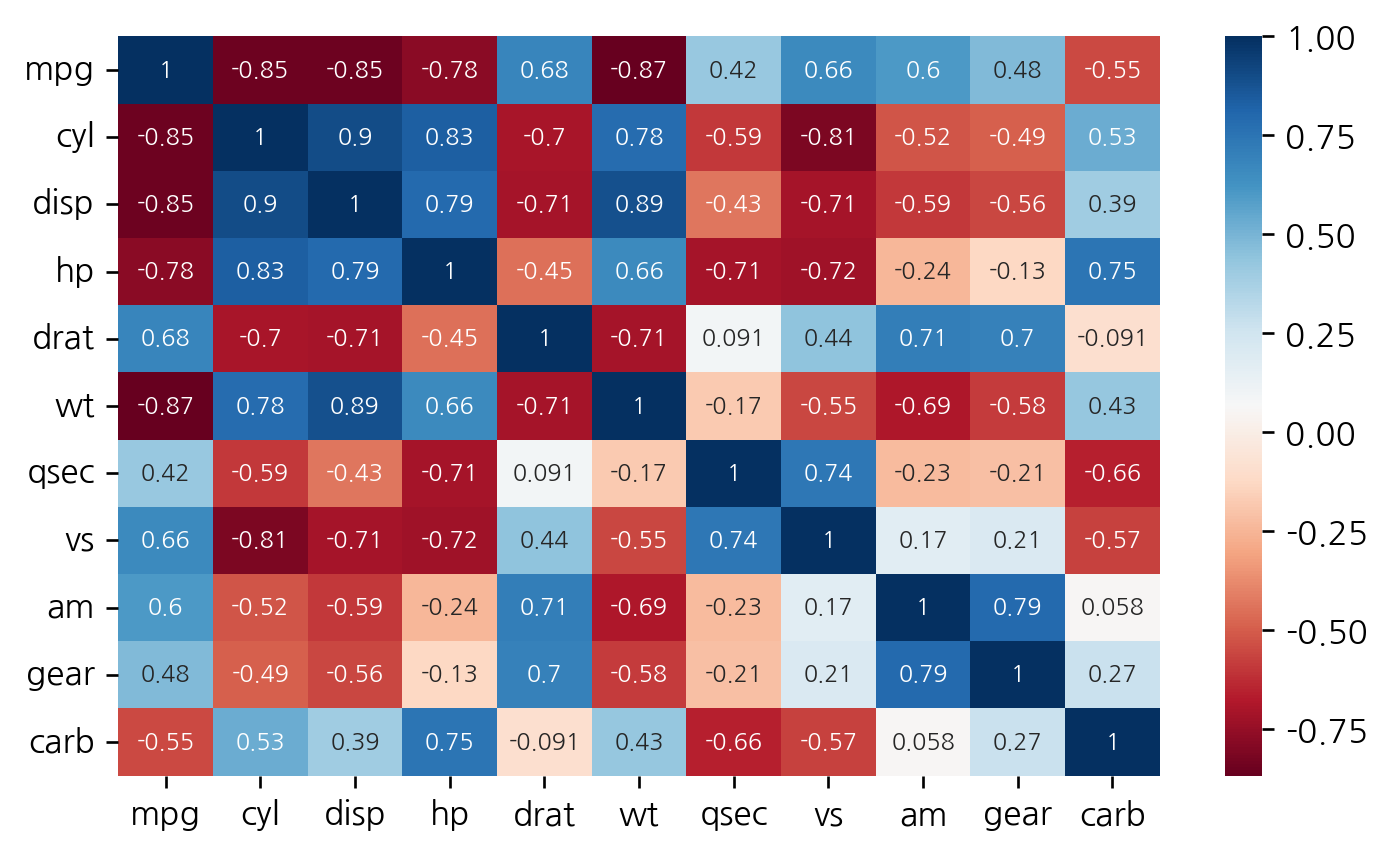

In [42]:
# 히트맵 만들기
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,   # 상관계수 표시
            annot_kws = {"size": 7},
            cmap = 'RdBu');  # 컬러맵

#### 3. 대각 행렬 제거하기

**(1) mask 만들기**

In [49]:
# mask 만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
np.ones_like(car_cor)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [51]:
mask.shape

(11, 11)

In [54]:
# 오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**(2) 히트맵에 mask 적용하기**

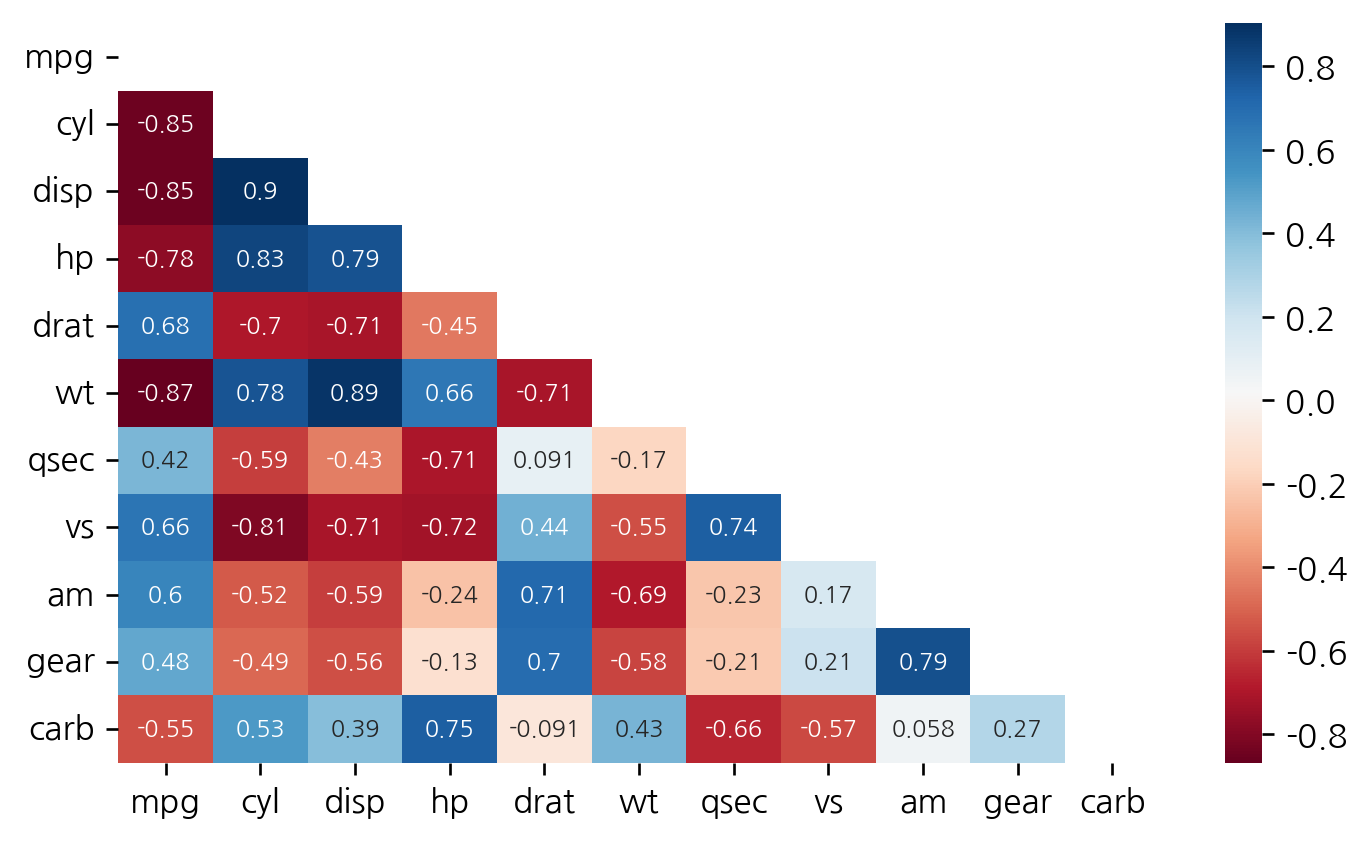

In [55]:
# 히트맵 만들기
sns.heatmap(data = car_cor,
            annot = True,   # 상관계수 표시
            cmap = 'RdBu',  # 컬러맵
            annot_kws = {"size": 7},
            mask = mask);    # mask 적용


**(3) 빈 행과 열 제거하기**

In [58]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [57]:
mask[1:, :-1]

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
mask_new = mask[1:, :-1]         # mask 첫 번째 행, 마지막 열 제거, 기말시험
cor_new = car_cor.iloc[1:, :-1]  # dataframe 상관행렬 첫 번째 행, 마지막 열 제거
cor_new

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
cyl,-0.852,1.000,0.902,0.832,-0.700,0.782,-0.591,-0.811,-0.523,-0.493
disp,-0.848,0.902,1.000,0.791,-0.710,0.888,-0.434,-0.710,-0.591,-0.556
hp,-0.776,0.832,0.791,1.000,-0.449,0.659,-0.708,-0.723,-0.243,-0.126
drat,0.681,-0.700,-0.710,-0.449,1.000,-0.712,0.091,0.440,0.713,0.700
wt,-0.868,0.782,0.888,0.659,-0.712,1.000,-0.175,-0.555,-0.692,-0.583
qsec,0.419,-0.591,-0.434,-0.708,0.091,-0.175,1.000,0.745,-0.230,-0.213
vs,0.664,-0.811,-0.710,-0.723,0.440,-0.555,0.745,1.000,0.168,0.206
am,0.600,-0.523,-0.591,-0.243,0.713,-0.692,-0.230,0.168,1.000,0.794
gear,0.480,-0.493,-0.556,-0.126,0.700,-0.583,-0.213,0.206,0.794,1.000
carb,-0.551,0.527,0.395,0.750,-0.091,0.428,-0.656,-0.570,0.058,0.274


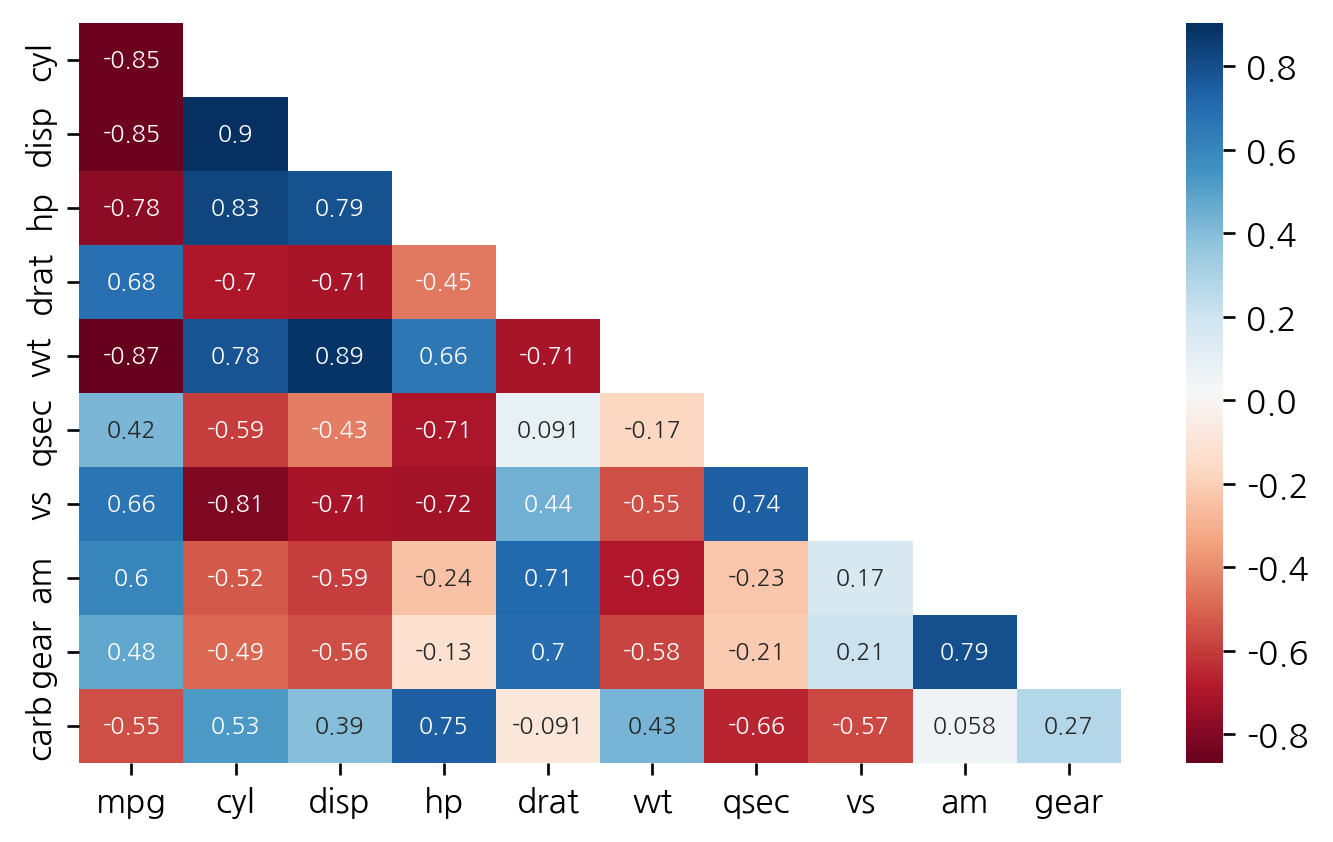

In [60]:
# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,       # 상관계수 표시
            cmap = 'RdBu',      # 컬러맵
            annot_kws = {"size": 7},
            mask = mask_new);    # mask 적용

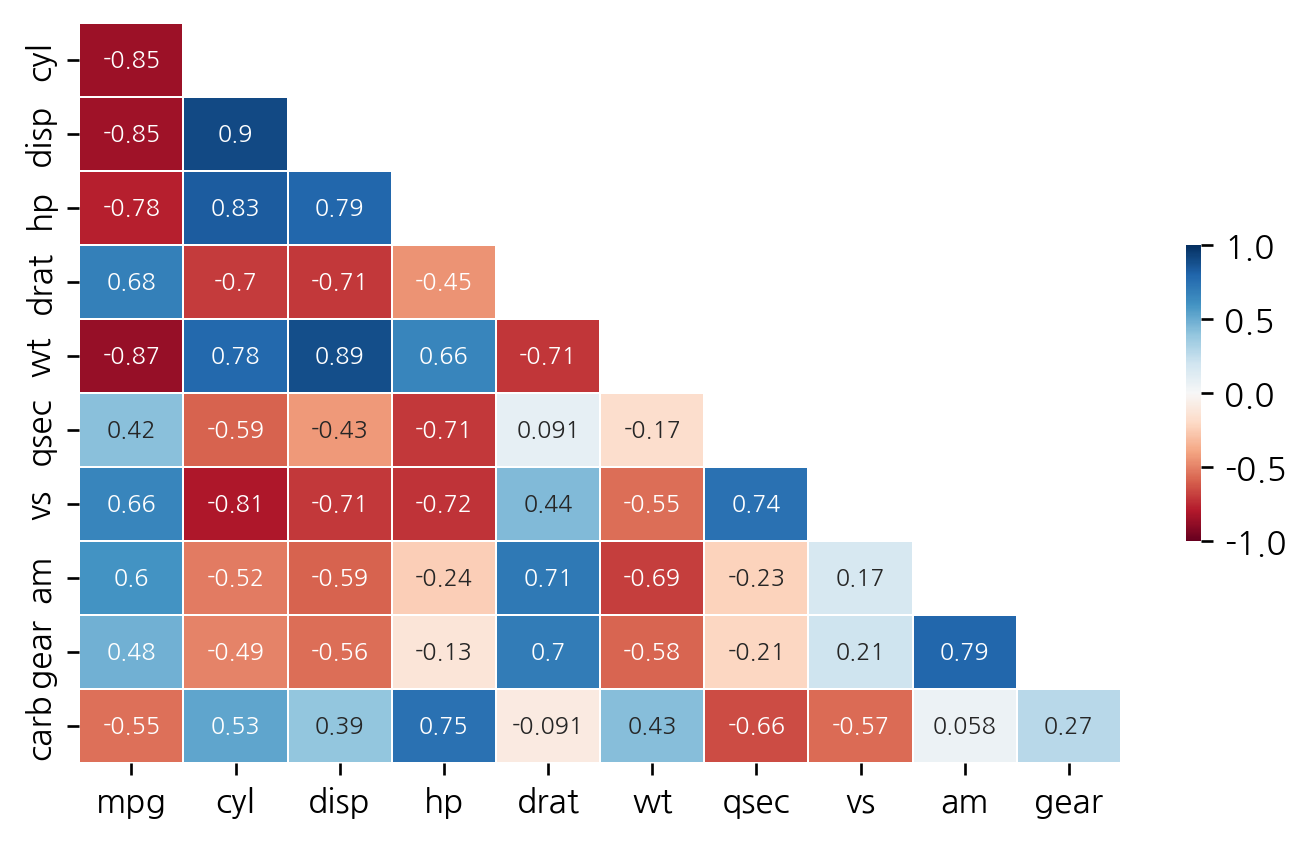

In [62]:
# 히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,               # 상관계수 표시
            cmap = 'RdBu',              # 컬러맵
            mask = mask_new,            # mask 적용
            linewidths = .5,            # 경계 구분선 추가
            annot_kws = {"size": 7},
            vmax = 1,                   # 가장 진한 파란색으로 표현할 최대값
            vmin = -1,                  # 가장 진한 빨간색으로 표현할 최소값
            cbar_kws = {'shrink': .4});  # 범례 크기 줄이기